In [1]:
!pip install tweepy
!pip install textblob 
!pip install wordcloud
!pip install HTMLParser

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
log = pd.read_csv("sample_data/Login.csv")

consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [5]:
authenticate =tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [6]:
import csv
csvFile = open('tweet.csv', 'a')
csvWriter = csv.writer(csvFile)


In [149]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

searched_tweets = []
last_id = -1
while len(searched_tweets) < noofsearch:
    count = noofsearch - len(searched_tweets)
    try:
        new_tweets = api.search(q = searchTerm +" -filter:retweets", count = count, lang= "en", tweet_mode= "extended",  max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

enter keyword/hashtag to be searched about : DilBechara
Enter how many tweets to analyse : 5000


header_list = ["Tweets"]
df = pd.read_csv('tweet.csv',names=header_list)

In [150]:
df=pd.DataFrame([tweet.full_text for tweet in searched_tweets], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in searched_tweets])
df['date'] = np.array([tweet.created_at for tweet in searched_tweets])
df['source'] = np.array([tweet.source for tweet in searched_tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in searched_tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in searched_tweets])



df.to_csv('tweets_exported.csv', encoding='utf-8')
df.head()
df.shape
    



(5000, 6)

In [151]:
#clean data
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove tags
    text=re.sub(r'# ','', text) #remove hashtags
    text=re.sub(r'RT[\s]+','', text) #remove retweets
    text=re.sub(r'https?:\/\/\S','', text) #remove hyperlinks
    
    return text

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweets']= df['tweets'].apply(clean)
df['tweets'] = df['tweets'].apply(lambda x: remove_punct(x))

df.head(10)

df.to_csv('tweets_exported_cleaned.csv', encoding='utf-8')
    

In [152]:
from html.parser import HTMLParser
#import markupbase
html_parser = HTMLParser()
df['tweets'] = html_parser.unescape(df['tweets'])
df.to_csv('tweets_exported_cleaned_htmlparsing.csv', encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


In [153]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df.head()


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity
0,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,1280153179645083648,2020-07-06 14:54:36,Twitter Web App,0,0,0.800000,0.700000
1,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,1280153121998553090,2020-07-06 14:54:23,Twitter Web App,0,0,0.200000,0.300000
2,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,1280153121323282433,2020-07-06 14:54:22,Twitter for Android,1,1,0.454545,0.136364
3,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,1280153120375373825,2020-07-06 14:54:22,Twitter for Android,1,0,0.000000,0.000000
4,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,1280153115988238338,2020-07-06 14:54:21,Twitter for Android,1,0,1.000000,-0.500000


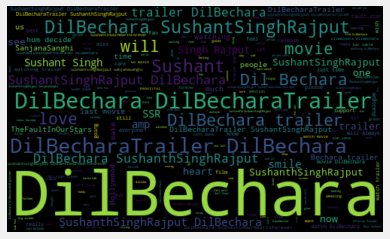

In [154]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width= 500, height = 300, random_state= 25, max_font_size= 120).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show();



In [156]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')
df.head()
        
       

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis
0,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,1280153179645083648,2020-07-06 14:54:36,Twitter Web App,0,0,0.800000,0.700000,Positive
1,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,1280153121998553090,2020-07-06 14:54:23,Twitter Web App,0,0,0.200000,0.300000,Positive
2,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,1280153121323282433,2020-07-06 14:54:22,Twitter for Android,1,1,0.454545,0.136364,Positive
3,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,1280153120375373825,2020-07-06 14:54:22,Twitter for Android,1,0,0.000000,0.000000,Neutral
4,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,1280153115988238338,2020-07-06 14:54:21,Twitter for Android,1,0,1.000000,-0.500000,Negative


Cleaning 
Remove Punctuation
Tokenization
Remove Stop Words
Stemming/Lemmatizing

In [157]:
pd.set_option('display.max_colwidth',280)
df['tweets'].head()

0                                                                                                                                                                                                                                         frver 😭😭😭 I really loved the trailer ❤️ DilBechara
1    I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...
2                                                                                    Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens
3                                                                                                                                                

In [158]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [159]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['Tweet_punct'] = df['tweets'].apply(lambda x: remove_punct(x))
df.to_csv('tweets_exported_removed_punct.csv', encoding='utf-8')
df.head(10)


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct
0,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,1280153179645083648,2020-07-06 14:54:36,Twitter Web App,0,0,0.800000,0.700000,Positive,frver 😭😭😭 I really loved the trailer ❤️ DilBechara
1,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,1280153121998553090,2020-07-06 14:54:23,Twitter Web App,0,0,0.200000,0.300000,Positive,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...
2,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,1280153121323282433,2020-07-06 14:54:22,Twitter for Android,1,1,0.454545,0.136364,Positive,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens
3,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,1280153120375373825,2020-07-06 14:54:22,Twitter for Android,1,0,0.000000,0.000000,Neutral,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN
4,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,1280153115988238338,2020-07-06 14:54:21,Twitter for Android,1,0,1.000000,-0.500000,Negative,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR
5,Watch Dil Bechara Trailer REVIEW Deeksha Sharma on YouTube cotzBMGqnx\nThank you for your genuine review Will make this a big blockbuster DilBechara SushantSinghRajput ❤💗,1280153099965886464,2020-07-06 14:54:17,Twitter Web App,0,0,0.300000,0.200000,Positive,Watch Dil Bechara Trailer REVIEW Deeksha Sharma on YouTube cotzBMGqnx\nThank you for your genuine review Will make this a big blockbuster DilBechara SushantSinghRajput ❤💗
6,DilBechara SushantSinghRajput\nThis scene is gonna have a separate Fan Base 💕 cogVSizwddLJ,1280153097273135104,2020-07-06 14:54:17,Twitter for Android,0,0,1.000000,-0.800000,Negative,DilBechara SushantSinghRajput\nThis scene is gonna have a separate Fan Base 💕 cogVSizwddLJ
7,❤️❤️❤️❤️❤️ DilBechara gone to be blockbuster for sure Love for SushantSinghRajput guys hatters gonna be hate We dont care Its story of love and he always spread love so ham bhii pyaar felayenge\nKeep support coRSncoffM,1280153074867113985,2020-07-06 14:54:11,Twitter for Android,0,0,0.717778,0.240000,Positive,❤️❤️❤️❤️❤️ DilBechara gone to be blockbuster for sure Love for SushantSinghRajput guys hatters gonna be hate We dont care Its story of love and he always spread love so ham bhii pyaar felayenge\nKeep support coRSncoffM
8,this one breaks my heart n made me cry so hard\nDilBecharaTrailer DilBechara coAhnyidMqF,1280153072329609217,2020-07-06 14:54:11,Twitter Web App,0,0,0.541667,-0.291667,Negative,this one breaks my heart n made me cry so hard\nDilBecharaTrailer DilBechara coAhnyidMqF
9,Playing this on loop rn His chal jhuthi and then the way he smiles after that was so cute Youre not with us anymore but youll always be in our hearts❤ \n \nDilBechara SushantSinghRajput SanjanaSanghi cowSdkrzMq,1280153070874353664,2020-07-06 14:54:10,Twitter for Android,0,0,1.000000,0.500000,Positive,Playing this on loop rn His chal jhuthi and then the way he smiles after that was so

Tokenization

In [160]:
import re

def tokenize(text):
  tokens = re.split('\W+',text)
  return tokens

df['tweet_clean_tokenized'] = df['Tweet_punct'].apply(lambda x:tokenize(x.lower()))
df['tweet_clean_tokenized'].head(5)
#df['Tweet_punct'].head(5)


0                                                                                                                                                                                                                                        [frver, i, really, loved, the, trailer, dilbechara]
1    [i, used, to, hear, in, childhood, that, those, who, die, become, stars, in, the, skyunbelievable, then, we, made, fun, of, things, but, now, he, does, not, like, to, lie, to, him, because, someone, kept, looking, at, us, from, the, sky, what, would, happen, if, you, were, he...
2                                                                               [, its, sushant, singh, rajput, i, think, dilbecharatrailer, will, create, a, new, record, on, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]
3                                                                                                                                                

No Stop Words

In [161]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [162]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_clean_nostopwords'] = df['tweet_clean_tokenized'].apply(lambda x:remove_stopwords(x))
df['tweet_clean_nostopwords'].head(5)

0                                                                                                                                                        [frver, really, loved, trailer, dilbechara]
1    [used, hear, childhood, die, become, stars, skyunbelievable, made, fun, things, like, lie, someone, kept, looking, us, sky, would, happen, among, us, sushant, itsssr, dilbechara, comdeqsdata]
2            [, sushant, singh, rajput, think, dilbecharatrailer, create, new, record, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]
3                                                                                    [request, please, koi, meme, mat, banao, iss, movie, pe, hurting, sushantsinghrajput, dilbechara, cokoivlcyein]
4                                                                              [, youtube, link, fake, rights, post, sushantsinghrajput, dilbechara, justiceforsushantsinghrajput, cbienquiryforssr]
Name: tweet_cle

In [163]:
def merge_text(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
  
df['tweet_ready'] = df['tweet_clean_nostopwords'].apply(lambda x: merge_text(x))
df.to_csv('tweets_exported_ready.csv', encoding='utf-8')
df.head(10)

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready
0,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,1280153179645083648,2020-07-06 14:54:36,Twitter Web App,0,0,0.800000,0.700000,Positive,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,"[frver, i, really, loved, the, trailer, dilbechara]","[frver, really, loved, trailer, dilbechara]",frver really loved trailer dilbechara
1,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,1280153121998553090,2020-07-06 14:54:23,Twitter Web App,0,0,0.200000,0.300000,Positive,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,"[i, used, to, hear, in, childhood, that, those, who, die, become, stars, in, the, skyunbelievable, then, we, made, fun, of, things, but, now, he, does, not, like, to, lie, to, him, because, someone, kept, looking, at, us, from, the, sky, what, would, happen, if, you, were, he...","[used, hear, childhood, die, become, stars, skyunbelievable, made, fun, things, like, lie, someone, kept, looking, us, sky, would, happen, among, us, sushant, itsssr, dilbechara, comdeqsdata]",used hear childhood die become stars skyunbelievable made fun things like lie someone kept looking us sky would happen among us sushant itsssr dilbechara comdeqsdata
2,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,1280153121323282433,2020-07-06 14:54:22,Twitter for Android,1,1,0.454545,0.136364,Positive,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,"[, its, sushant, singh, rajput, i, think, dilbecharatrailer, will, create, a, new, record, on, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]","[, sushant, singh, rajput, think, dilbecharatrailer, create, new, record, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]",sushant singh rajput think dilbecharatrailer create new record youtube sushantinourheartsforever dilbecharatrailer sushantsingrajput dilbechara dilbecharaonbigscreens
3,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,1280153120375373825,2020-07-06 14:54:22,Twitter for Android,1,0,0.000000,0.000000,Neutral,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,"[i, request, to, all, please, koi, meme, mat, banao, iss, movie, pe, its, hurting, sushantsinghrajput, dilbechara, cokoivlcyein]","[request, please, koi, meme, mat, banao, iss, movie, pe, hurting, sushantsinghrajput, dilbechara, cokoivlcyein]",request please koi meme mat banao iss movie pe hurting sushantsinghrajput dilbechara cokoivlcyein
4,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,1280153115988238338,2020-07-06 14:54:21,Twitter for Android,1,0,1.000000,-0.500000,Negative,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,"[, where, is, the, youtube, link, you, fake, you, have, no, rights, to, post, sushantsinghrajput, dilbechara, justiceforsushantsinghrajput, cbienquiryfo

In [165]:
df['Analysis_toInt'] = pd.factorize(df['Analysis'])[0]
df.head(20)

,tweets,id,date,source,likes,retweets,Subjectivity,Polarity,Analysis,Tweet_punct,tweet_clean_tokenized,tweet_clean_nostopwords,tweet_ready,Analysis_toInt
0,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,1280153179645083648,2020-07-06 14:54:36,Twitter Web App,0,0,0.800000,0.700000,Positive,frver 😭😭😭 I really loved the trailer ❤️ DilBechara,"[frver, i, really, loved, the, trailer, dilbechara]","[frver, really, loved, trailer, dilbechara]",frver really loved trailer dilbechara,0
1,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,1280153121998553090,2020-07-06 14:54:23,Twitter Web App,0,0,0.200000,0.300000,Positive,I used to hear in childhood that those who die become stars in the skyUnbelievable then we made fun of things\nBut now he does not like to lie to him because someone kept looking at us from the sky\nWhat would happen if you were here among us Sushant itsssr DilBechara coMdeqs...,"[i, used, to, hear, in, childhood, that, those, who, die, become, stars, in, the, skyunbelievable, then, we, made, fun, of, things, but, now, he, does, not, like, to, lie, to, him, because, someone, kept, looking, at, us, from, the, sky, what, would, happen, if, you, were, he...","[used, hear, childhood, die, become, stars, skyunbelievable, made, fun, things, like, lie, someone, kept, looking, us, sky, would, happen, among, us, sushant, itsssr, dilbechara, comdeqsdata]",used hear childhood die become stars skyunbelievable made fun things like lie someone kept looking us sky would happen among us sushant itsssr dilbechara comdeqsdata,0
2,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,1280153121323282433,2020-07-06 14:54:22,Twitter for Android,1,1,0.454545,0.136364,Positive,Its Sushant Singh Rajput😠\n\nI think DilBecharaTrailer will create a new record on YouTube\n\n \nSushantInOurHeartsForever\nDilBecharaTrailer \nSushantSingRajput \nDilBechara \nDilBecharaOnBigScreens,"[, its, sushant, singh, rajput, i, think, dilbecharatrailer, will, create, a, new, record, on, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]","[, sushant, singh, rajput, think, dilbecharatrailer, create, new, record, youtube, sushantinourheartsforever, dilbecharatrailer, sushantsingrajput, dilbechara, dilbecharaonbigscreens]",sushant singh rajput think dilbecharatrailer create new record youtube sushantinourheartsforever dilbecharatrailer sushantsingrajput dilbechara dilbecharaonbigscreens,0
3,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,1280153120375373825,2020-07-06 14:54:22,Twitter for Android,1,0,0.000000,0.000000,Neutral,I request to all please koi meme mat banao iss movie pe 🙏😭💔 its hurting SushantSinghRajput DilBechara coKOIvlcyEIN,"[i, request, to, all, please, koi, meme, mat, banao, iss, movie, pe, its, hurting, sushantsinghrajput, dilbechara, cokoivlcyein]","[request, please, koi, meme, mat, banao, iss, movie, pe, hurting, sushantsinghrajput, dilbechara, cokoivlcyein]",request please koi meme mat banao iss movie pe hurting sushantsinghrajput dilbechara cokoivlcyein,1
4,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,1280153115988238338,2020-07-06 14:54:21,Twitter for Android,1,0,1.000000,-0.500000,Negative,Where is the youtube link you fake You have no rights to post SushantSinghRajput DilBechara JusticeForSushantSinghRajput CBIEnquiryForSSR,"[, where, is, the, youtube, link, you, fake, you, have, no, rights, to, post, sushantsinghrajput, dilbechara, justiceforsushantsi

In [166]:
from keras.preprocessing.text import Tokenizer

In [167]:
tokenizer = Tokenizer(num_words = 280, lower=True, oov_token='<UNK>')

tokenizer.fit_on_texts(df['tweet_ready'])

word_index = tokenizer.word_index
print(word_index)

{'<UNK>': 1, 'dilbechara': 2, 'dilbecharatrailer': 3, 'trailer': 4, 'sushantsinghrajput': 5, 'sushanthsinghrajput': 6, 'movie': 7, 'sushant': 8, 'watch': 9, 'love': 10, 'sushantinourheartsforever': 11, 'last': 12, 'dil': 13, 'smile': 14, 'us': 15, 'bechara': 16, 'make': 17, 'miss': 18, 'u': 19, 'amp': 20, 'one': 21, 'sanjanasanghi': 22, 'watching': 23, 'heart': 24, 'always': 25, 'film': 26, 'hai': 27, 'like': 28, 'ssr': 29, 'time': 30, 'singh': 31, 'see': 32, 'decide': 33, 'cant': 34, 'bollywood': 35, 'likes': 36, 'dont': 37, 'life': 38, 'rajput': 39, 'much': 40, 'please': 41, 'youtube': 42, 'lets': 43, 'watched': 44, 'emotional': 45, 'people': 46, 'forever': 47, 'really': 48, 'know': 49, 'thefaultinourstars': 50, 'still': 51, 'cry': 52, 'get': 53, 'hum': 54, 'beautiful': 55, 'would': 56, 'live': 57, 'video': 58, 'kab': 59, 'guys': 60, 'wish': 61, 'going': 62, 'gonna': 63, 'go': 64, 'views': 65, 'release': 66, 'hard': 67, 'everyone': 68, 'alive': 69, 'hope': 70, 'never': 71, 'stars': 7

In [168]:
rev_seq = tokenizer.texts_to_sequences(df['tweet_ready'])
print(rev_seq)


[[1, 48, 119, 4, 2], [1, 1, 1, 135, 1, 72, 1, 80, 1, 1, 28, 1, 216, 1, 132, 15, 1, 56, 1, 1, 15, 8, 1, 2, 1], [8, 31, 39, 165, 3, 1, 1, 166, 42, 11, 3, 136, 2, 89], [1, 41, 1, 1, 1, 1, 1, 7, 1, 1, 5, 2, 1], [42, 100, 1, 1, 1, 5, 2, 167, 1], [9, 13, 16, 4, 1, 1, 1, 42, 1, 182, 1, 1, 17, 101, 157, 2, 5], [2, 5, 183, 63, 1, 223, 1, 1], [2, 242, 157, 173, 10, 5, 60, 1, 63, 1, 37, 1, 139, 10, 25, 1, 10, 1, 1, 1, 1, 254, 91, 1], [21, 1, 24, 107, 80, 52, 67, 3, 2, 1], [1, 1, 1, 147, 1, 158, 1, 230, 261, 15, 1, 1, 25, 74, 2, 5, 22, 1], [1, 1, 210, 2, 1, 1], [2, 63, 67, 9, 1, 117, 1], [37, 165, 1, 273, 9, 7, 2, 1], [3, 2, 5, 11, 1, 1], [44, 3, 48, 1, 24, 60, 1, 9, 5, 12, 7, 2, 4, 1, 3, 100, 1], [61, 139, 56, 1, 46, 1, 91, 1, 1, 1, 1, 1, 274, 1, 1, 1, 1, 1, 5, 2, 1], [1, 1, 48, 243, 9, 174, 29, 18, 47, 29, 5, 2, 167], [51, 34, 97, 4, 2, 1, 24, 1, 95, 6, 2], [9, 4, 2, 3, 6, 104, 1], [1, 1, 101, 95, 66, 3, 2], [2, 279, 49, 48, 63, 67, 9, 7, 174, 153, 1, 12, 7, 1, 71, 32, 35, 91, 125, 9, 248, 1, 1]

In [169]:
rev_labels = df['Analysis_toInt']
import numpy as np
rev_seq_arry = np.array(rev_seq)
print(rev_seq_arry)
print(type(rev_seq_arry))
rev_labels_arry = rev_labels.to_numpy()
print(type(rev_labels_arry))
rev_labels_arry

[list([1, 48, 119, 4, 2])
 list([1, 1, 1, 135, 1, 72, 1, 80, 1, 1, 28, 1, 216, 1, 132, 15, 1, 56, 1, 1, 15, 8, 1, 2, 1])
 list([8, 31, 39, 165, 3, 1, 1, 166, 42, 11, 3, 136, 2, 89]) ...
 list([124, 1, 129, 3, 2, 29, 5, 271, 1, 1, 1, 1])
 list([1, 1, 147, 1, 1, 1, 161, 272, 1, 206, 2, 5, 3, 89, 123])
 list([43, 17, 1, 1, 4, 1, 249, 1, 6, 1, 2, 4, 1, 1])]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([0, 0, 0, ..., 1, 0, 0])

In [170]:
import keras as K

In [171]:
from keras.models import Sequential
from keras.layers import Dense

In [172]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(rev_seq_arry, rev_labels_arry, test_size=0.3)
print ('Train set:', train_x.shape,  train_y.shape)
print ('Test set:', test_x.shape,  test_y.shape)


Train set: (3500,) (3500,)
Test set: (1500,) (1500,)


In [173]:
train_x.shape, test_x.shape
print(train_x)

[list([5, 12, 26, 2, 1, 22, 1, 10, 139, 228, 77, 1, 25, 62, 1, 1, 1, 26, 9, 1, 1, 1, 1])
 list([23, 4, 5, 12, 26, 2, 20, 260, 24, 257, 1, 144, 1, 7, 1, 1, 56, 1, 1, 72, 1, 20, 132, 1])
 list([55, 14, 81, 3, 5, 11, 2, 1]) ...
 list([63, 10, 113, 51, 243, 97, 1, 236, 273, 32, 119, 190, 81, 1, 1, 6, 1])
 list([1, 1, 120, 1, 1, 1, 120, 1, 1, 1, 2, 1, 1, 1])
 list([1, 16, 4, 246, 78, 45, 78, 52, 1, 1, 207, 1, 4, 3, 2, 6])]


In [174]:
max_review_length = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x,truncating='post',padding='post',maxlen=max_review_length)
test_x = K.preprocessing.sequence.pad_sequences(test_x,truncating='post',padding='post',maxlen=max_review_length)
print(type(train_x))
print(train_x[0:5])
print('x_train shape:', train_x.shape)
print('x_test shape:', test_x.shape)
max_words = 20000

<class 'numpy.ndarray'>
[[  5  12  26   2   1  22   1  10 139 228  77   1  25  62   1   1   1  26
    9   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 23   4   5  12  26   2  20 260  24 257   1 144   1   7   1   1  56   1
    1  72   1  20 132   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 55  14  81   3   5  11   2   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 80, 64)            1280000   
_________________________________________________________________
sentiment_analysis_LSTM (LST (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


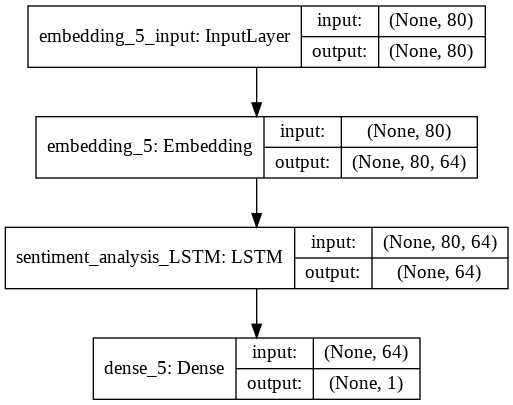

In [175]:
from keras.layers import LSTM, Dense
from keras.layers.embeddings import Embedding
from keras.models import Sequential

#emb_vec_len = 100
emb_vec_len = 64

model = Sequential()
#model.add(Embedding(input_dim = max_words, output_dim = emb_vec_len, mask_zero=True))
model.add(Embedding(input_dim = max_words, output_dim = emb_vec_len, input_length=max_review_length))
model.add(LSTM(units = 64,name='sentiment_analysis_LSTM'))
#model.add(LSTM(units = 64, batch_input_shape=(max_review_length,embedding_length), return_sequences=False, unroll=True))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#visualize

model.summary()
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='sent_analysis_model.png')

In [176]:
print('Training....')
batch_size = 32

model.fit(train_x, train_y, batch_size=batch_size, epochs=10,validation_data = (test_x,test_y))

Training....


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 9s 3ms/step - loss: 0.6556 - accuracy: 0.3997 - val_loss: 0.6516 - val_accuracy: 0.3887
Epoch 2/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6504 - accuracy: 0.3997 - val_loss: 0.6525 - val_accuracy: 0.3887
Epoch 3/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6497 - accuracy: 0.3997 - val_loss: 0.6518 - val_accuracy: 0.3887
Epoch 4/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6507 - accuracy: 0.3997 - val_loss: 0.6515 - val_accuracy: 0.3887
Epoch 5/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6493 - accuracy: 0.3997 - val_loss: 0.6527 - val_accuracy: 0.3887
Epoch 6/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6490 - accuracy: 0.3997 - val_loss: 0.6521 - val_accuracy: 0.3887
Epoch 7/10
3500/3500 [==============================] - 8s 2ms/step - loss: 0.6497 - acc

In [148]:
score, acc = model.evaluate(test_x,test_y,batch_size=batch_size)
print(f'Test score = {score}')
print(f'Test accuracy = {acc}')

1500/1500 [==============================] - 1s 408us/step
Test score = -28.5534431254069
Test accuracy = 0.4339999854564667
